<a href="https://colab.research.google.com/github/Molter73/ai-class/blob/main/Aprendizaje_No_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje No-Supervisado

Recordemos que el proposito del aprendizaje automatico superviado es predecir la realidad. El aprendizaje no supervisado tiene como proposito clasificar la realidad y generar predicciones sobre esta clasificacion. El aprendizaje no supervisado clasifica por similaridad.

La principal ventaja del aprendizaje no supervisado es que no se necesitan series de datos etiquetadas para proceder a la clasificacion.

La gran mayoria de modelos de aprendizaje no supervisado utilizan tecnicas de agrupacion por similaridad (distancia) entre parametros.

Vamos a necesitar los siguientes modulos:

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

Generamos un grupo de puntos utilizando la funcion make_blobs:

In [2]:
puntos, idx_grupos = make_blobs(n_samples=300,
                                centers=4,
                                cluster_std=0.8,
                                random_state=0)

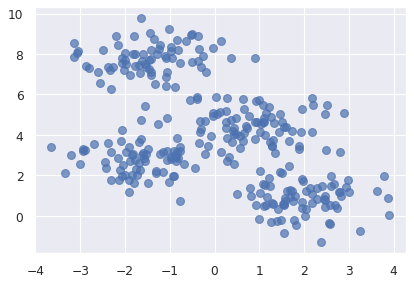

In [3]:
x = puntos[:, 0]
y = puntos[:, 1]

plt.figure(figsize=(6, 4), dpi=80)
plt.scatter(x, y, s=50, alpha=0.7);

Podemos ajustar estos puntos a un numero determinado de grupos:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


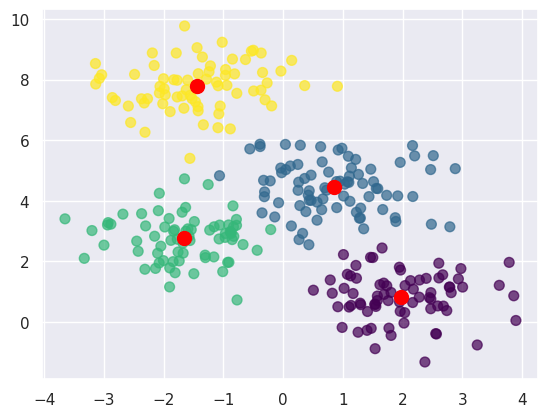

In [4]:
# https://scikit-learn.org/stable/modules/clustering.html#k-means
k_medias = KMeans(n_clusters=4, random_state=0)
k_medias.fit(puntos)
idx_prediccion = k_medias.predict(puntos)

plt.scatter(x, y, c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')

centroides = k_medias.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100);

Este es el procedimiento del algoritmo:

![picture](https://drive.google.com/uc?export=view&id=1-05xoK1X6jPUlA-lRg-E2mSP7STLM-Me)

¿Puedes probar a agrupar estos puntos en otro numero de grupos: 2, 3, 5 y 15 grupos?¿Que efecto tiene en la posicion de los centroides?¿Cual es el numero correcto de grupos?

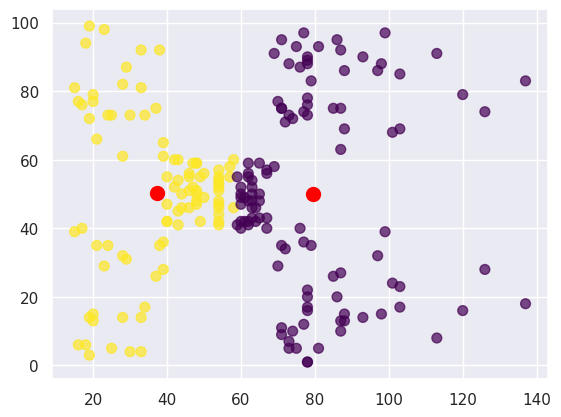

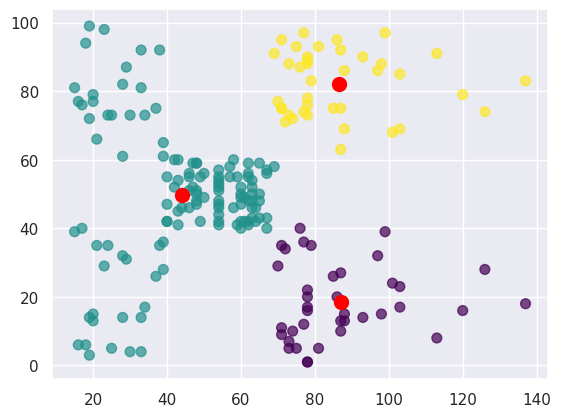

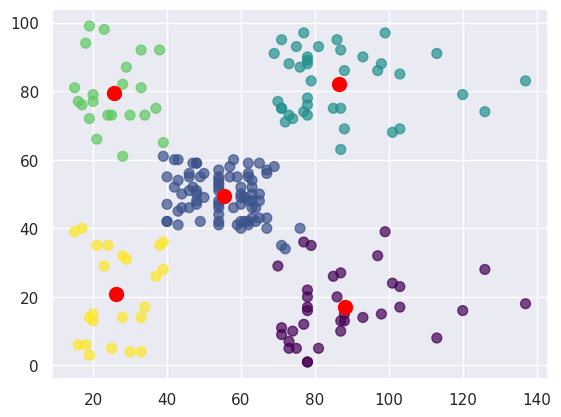

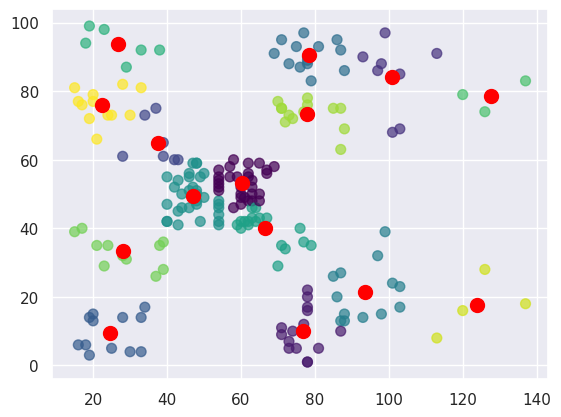

In [27]:
# https://scikit-learn.org/stable/modules/clustering.html#k-means
group_sizes = [2, 3, 5, 15]
for n in group_sizes:
  k_medias = KMeans(n_clusters=n, random_state=0, n_init=10)
  k_medias.fit(puntos)
  idx_prediccion = k_medias.predict(puntos)

  plt.scatter(x, y, c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')

  centroides = k_medias.cluster_centers_
  plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100);
  plt.show()

Podemos utilizar un metodo menos visual para decidir el numero de grupos que nos ofrece la clasificacion mas efectiva:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

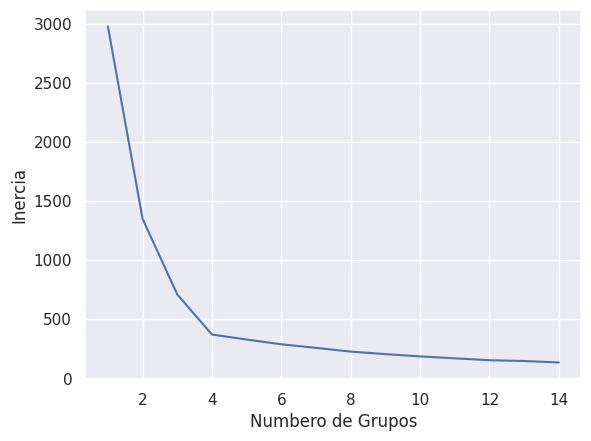

In [15]:
inercias = []

for i in range(1, 15):
  k_medias = KMeans(n_clusters=i, random_state=0)
  k_medias.fit(puntos)
  inercias.append(k_medias.inertia_)

plt.plot(range(1, 15), inercias)
plt.xlabel('Numbero de Grupos')
plt.ylabel('Inercia');

Ya que el metodo visual no es muy mecanico, podemos encontrar la posicion del mejor valor en el codo mediante la doble derivacion:

In [16]:
pct_difs = np.diff(inercias)/np.array(inercias[1:])
pct_difs

array([-1.20820979, -0.90310861, -0.91804932, -0.12904541, -0.14077872,
       -0.11760151, -0.14126267, -0.10352559, -0.10580101, -0.09651899,
       -0.10575639, -0.0457493 , -0.09128665])

In [17]:
pct_dif_dif = np.diff(pct_difs)
pct_dif_dif

array([ 0.30510118, -0.01494072,  0.78900391, -0.01173331,  0.02317721,
       -0.02366116,  0.03773707, -0.00227542,  0.00928202, -0.0092374 ,
        0.0600071 , -0.04553735])

In [18]:
mejor_codo = np.argmax(pct_dif_dif)+2
mejor_codo

4

# Segmentacion de clientes

Datos adaptados de:
https://github.com/jeffprosise/Machine-Learning/blob/master/Data/customers.csv

Este tipo de tecnicas se pueden utilizar para segmentar, por ejemplo, los clientes de una empresa para poder ofrecerles el mejor servicio personalizado posible:

In [22]:
import pandas as pd

archivo_clientes = '/content/clientes.txt'
clientes = pd.read_csv(archivo_clientes, index_col='ID:Cliente')
clientes.head()

,Genero,Edad,Salario,Clasificacion_gasto
ID:Cliente,,,,
1,Hombre,19,15,39
2,Hombre,21,15,81
3,Mujer,20,16,6
4,Mujer,23,16,77
5,Mujer,31,17,40


Salario y Clasificacion de Gasto nos pueden indicar que clientes podrian estar interesados en aumentar su nivel de compras:

In [23]:
puntos = clientes[ ['Salario','Clasificacion_gasto'] ].values
print(puntos)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Otra manera de hacer el vector.

In [24]:
x = clientes[['Salario']].values.squeeze()
y = clientes[['Clasificacion_gasto']].values.squeeze()
print(x)
print(y)

[ 15  15  16  16  17  17  18  18  19  19  19  19  20  20  20  20  21  21
  23  23  24  24  25  25  28  28  28  28  29  29  30  30  33  33  33  33
  34  34  37  37  38  38  39  39  39  39  40  40  40  40  42  42  43  43
  43  43  44  44  46  46  46  46  47  47  48  48  48  48  48  48  49  49
  50  50  54  54  54  54  54  54  54  54  54  54  54  54  57  57  58  58
  59  59  60  60  60  60  60  60  61  61  62  62  62  62  62  62  63  63
  63  63  63  63  64  64  65  65  65  65  67  67  67  67  69  69  70  70
  71  71  71  71  71  71  72  72  73  73  73  73  74  74  75  75  76  76
  77  77  77  77  78  78  78  78  78  78  78  78  78  78  78  78  79  79
  81  81  85  85  86  86  87  87  87  87  87  87  88  88  88  88  93  93
  97  97  98  98  99  99 101 101 103 103 103 103 113 113 120 120 126 126
 137 137]
[39 81  6 77 40 76  6 94  3 72 14 99 15 77 13 79 35 66 29 98 35 73  5 73
 14 82 32 61 31 87  4 73  4 92 14 81 17 73 26 75 35 92 36 61 28 65 55 47
 42 42 52 60 54 60 45 41 50 46 51 46 56 5

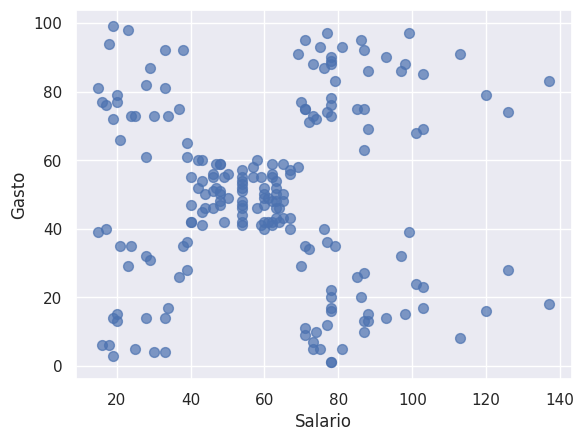

In [25]:
x = puntos[:, 0]
y = puntos[:, 1]

plt.scatter(x, y, s=50, alpha=0.7)
plt.xlabel('Salario')
plt.ylabel('Gasto');

¿En cuantos grupos podemos agruparlos? Visualmente parece que 5 grupos nos dan el menor numero de grupos que maximiza las diferencias entre los clientes de cada grupo.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


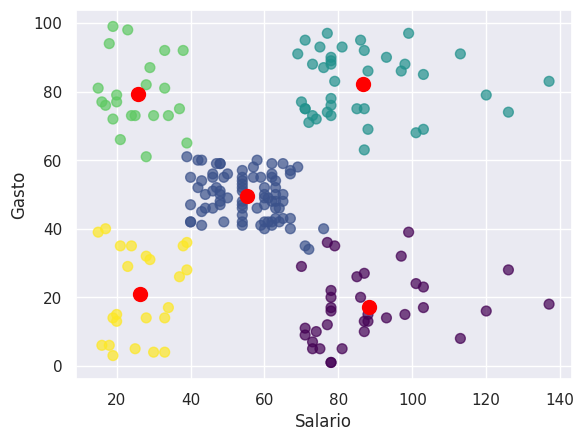

In [32]:
k_medias = KMeans(n_clusters=5, random_state=0)
k_medias.fit(puntos)
idx_prediccion = k_medias.predict(puntos)

plt.scatter(x, y, c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')
plt.xlabel('Salario')
plt.ylabel('Gasto')

centroides = k_medias.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100);

Hemos elegido 5 grupos por inspeccion visual del grafico. ¿Podrias demostrar que esta eleccion es correcta?

In [35]:
inercias = []

for i in range(1, 15):
  k_medias = KMeans(n_clusters=i, random_state=0, n_init=10)
  k_medias.fit(puntos)
  inercias.append(k_medias.inertia_)

# Realizamos la doble derivada y buscamos el punto de inflexión
pct_difs = np.diff(inercias)/np.array(inercias[1:])
print(pct_difs)
pct_dif_dif = np.diff(pct_difs)
print(pct_dif_dif)
mejor_codo = np.argmax(pct_dif_dif)+2
mejor_codo

[-0.48861892 -0.70537255 -0.44338596 -0.65764565 -0.19273912 -0.23153626
 -0.20577044 -0.14959482 -0.05272599 -0.17139204 -0.1196494  -0.07095338
 -0.12137952]
[-0.21675363  0.26198659 -0.21425969  0.46490653 -0.03879714  0.02576582
  0.05617562  0.09686883 -0.11866605  0.05174264  0.04869602 -0.05042614]


5

¿Cuales son los clientes con mayor salario y menor gasto? Podemos predecir en que grupo apareceria un cliente que tenga un salario de 120 y un gasto de 20:

In [42]:
objetivo = k_medias.predict(np.array([[20, 20]]))[0]
objetivo

9

Los clientes de este grupo de interes se pueden extraer de la serie de datos completa:

In [43]:
# Grupo de poco gastadores con altos ingresos:
clientes['Grupo'] = k_medias.predict(clientes[['Salario','Clasificacion_gasto']].values)
# Filtrado solo para estos clientes:
clientes[ clientes['Grupo'] == objetivo]

,Genero,Edad,Salario,Clasificacion_gasto,Grupo
ID:Cliente,,,,,
3,Mujer,20,16,6,9
7,Mujer,35,18,6,9
9,Hombre,64,19,3,9
11,Hombre,67,19,14,9
13,Mujer,58,20,15,9
15,Hombre,37,20,13,9
23,Mujer,46,25,5,9
25,Mujer,54,28,14,9
31,Hombre,60,30,4,9


In [44]:
clientes.tail()

,Genero,Edad,Salario,Clasificacion_gasto,Grupo
ID:Cliente,,,,,
196,Mujer,35,120,79,8
197,Mujer,45,126,28,6
198,Hombre,32,126,74,8
199,Hombre,32,137,18,6
200,Hombre,30,137,83,8


Orientando nuestros esfuerzos de marketing y ventas hacia estos clientes quizas maximicemos nuestra eficacia. Otro modelo podria entonces clasificar los clientes por susceptibilidad a nuestras ofertas.

# Clasificacion Multivariable

La clasificacion no esta limitada a dos variables (bivariable), sino que puede ser multivariable. Para ello, debemos primero modificar el formato de nuestros datos para hacer todas las variables comprensibles por la maquina:

In [45]:
from sklearn.preprocessing import LabelEncoder

df = clientes.copy()
codificador = LabelEncoder()
df['Genero'] = codificador.fit_transform(df['Genero'])
df.head()

,Genero,Edad,Salario,Clasificacion_gasto,Grupo
ID:Cliente,,,,,
1,0,19,15,39,5
2,0,21,15,81,0
3,1,20,16,6,9
4,1,23,16,77,0
5,1,31,17,40,5


Generando codificadores de etiquetas:

In [46]:
codificador_frutas = LabelEncoder()
frutas = ['Piña', 'Platano', 'Manzana', 'Pera']

In [47]:
codificador_frutas.fit(frutas);

In [48]:
codificador_frutas.transform(['Pera'])

array([1])

In [49]:
codificador_frutas.inverse_transform([3])

array(['Platano'], dtype='<U7')

Usaremos 3 variables inicialmente, es el limite de variables que podemos representar facilmente en el espacio tridimensional:

In [50]:
puntos = df[['Edad', 'Salario', 'Clasificacion_gasto']].values

In [51]:
k_medias = KMeans(n_clusters=5, random_state=0)
k_medias.fit(puntos)
df['Grupo'] = k_medias.predict(puntos)
df.Grupo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ID:Cliente
1      0
2      4
3      0
4      4
5      0
      ..
196    1
197    3
198    1
199    3
200    1
Name: Grupo, Length: 200, dtype: int32

Generamos una visualizacion tridimensional:

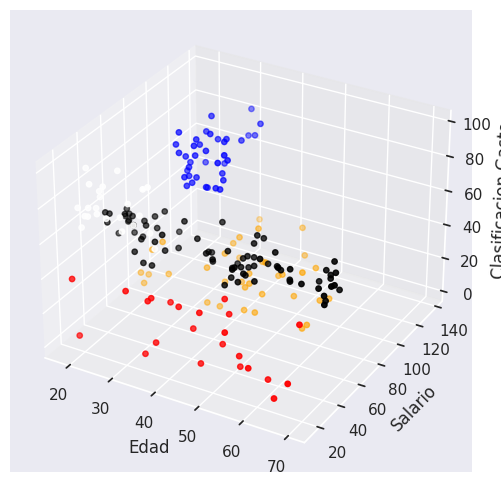

In [52]:
from mpl_toolkits.mplot3d import Axes3D

colors = ['red', 'blue', 'black', 'orange', 'white']

df['color'] = df.Grupo.map({0:colors[0], 1:colors[1], 2:colors[2],
                        3:colors[3], 4:colors[4]})

fig = plt.figure(figsize=(26,6))

ax = fig.add_subplot(132, projection='3d')
ax.scatter(df.Edad, df.Salario, df.Clasificacion_gasto, c=df.color, s=15)
ax.set_xlabel('Edad')
ax.set_ylabel('Salario')
ax.set_zlabel('Clasificacion Gasto')
plt.show()

¿Como son estos grupos? Inspeccionando sus valores medios ganamos algo mas de informacion:

In [53]:
resultados = pd.DataFrame(columns = ['Grupo',
                                     'Edad',
                                     'Ingresos Medios',
                                     'Gasto Medio'])

for i in range(len(k_medias.cluster_centers_)):
    edad = df[df['Grupo'] == i]['Edad'].mean()
    ingresos = df[df['Grupo'] == i]['Salario'].mean()
    gasto = df[df['Grupo'] == i]['Clasificacion_gasto'].mean()

    gdf = df[df['Grupo'] == i]

    resultados.loc[i] = ([i, edad, ingresos, gasto])

resultados.head()

,Grupo,Edad,Ingresos Medios,Gasto Medio
0,0.0,45.217391,26.304348,20.913043
1,1.0,32.692308,86.538462,82.128205
2,2.0,43.088608,55.291139,49.569620
3,3.0,40.666667,87.750000,17.583333
4,4.0,25.521739,26.304348,78.565217


In [54]:
k_medias.predict(np.array([[26, 26, 80]]))[0]

4

# Actividad:

Utilizando el archivo de datos sobre propiedas en EEUU, ¿Que tipo de grupos puedes generar mediante aprendizaje no supervisado?¿Que aplicaciones o utilidades podriamos extraer de estos datos?

Los datos son los siguientes:

'Avg. Area Income': Ingresos medios de los residentes en la localizacion.
'Avg. Area House Age': Antiguedad media de las casas en la ciudad.
'Avg. Area Number of Rooms': Media de habitaciones por casa en la zona.
'Avg. Area Number of Bedrooms': Media de dormitorios por casa en la zona.
'Area Population': Poblacion de la zona en la que se localiza la casa.
'Price': Precio de la casa.
'Address': Direccion postal de la casa.

In [55]:
import pandas as pd

archivo_casas = '/content/USA_Housing.csv'
casas = pd.read_csv(archivo_casas)
casas.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [62]:
df = casas.copy()
puntos = df[['Avg. Area House Age', 'Avg. Area Number of Rooms']].values

In [64]:
inercias = []

for i in range(1, 15):
  k_medias = KMeans(n_clusters=i, random_state=0, n_init=10)
  k_medias.fit(puntos)
  inercias.append(k_medias.inertia_)

# Realizamos la doble derivada y buscamos el punto de inflexión
pct_difs = np.diff(inercias)/np.array(inercias[1:])
print(pct_difs)
pct_dif_dif = np.diff(pct_difs)
print(pct_dif_dif)
mejor_codo = np.argmax(pct_dif_dif)+2
mejor_codo

[-0.48452681 -0.47500523 -0.28396449 -0.18309183 -0.21884255 -0.12956916
 -0.11342569 -0.11916852 -0.11158208 -0.08653412 -0.08505943 -0.07600469
 -0.06950512]
[ 0.00952158  0.19104074  0.10087265 -0.03575072  0.08927339  0.01614347
 -0.00574283  0.00758644  0.02504796  0.00147469  0.00905474  0.00649958]


3

In [65]:
k_medias = KMeans(n_clusters=3, random_state=0, n_init=10)
k_medias.fit(puntos)
df['Grupo'] = k_medias.predict(puntos)
df.Grupo

plt.scatter(x, y, c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')
plt.xlabel('Salario')
plt.ylabel('Gasto')

centroides = k_medias.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100);

0       1
1       0
2       1
3       0
4       1
       ..
4995    2
4996    2
4997    0
4998    1
4999    0
Name: Grupo, Length: 5000, dtype: int32